<a href="https://colab.research.google.com/github/Dmitry1937/NLP-Classification-/blob/main/Classification_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#! unzip ../content/drive/My\ Drive/14.17_Genre_Classification_Dataset.zip

In [ ]:
import os
import pandas as pd
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
import tensorflow as tf
import nltk
import string
import matplotlib.pyplot as plt
from gensim.models import Word2Vec 
from sklearn import metrics
from sklearn.utils import class_weight


nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
os.chdir('drive/MyDrive')

In [ ]:
#Загрузим данные 
train_data = pd.read_csv('Genre Classification Dataset/train_data.txt', sep = ' ::: ', header=None, index_col= [0],\
            engine='python', names=['TITLE','GENRE','DESCRIPTION'])
train_data.head()

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [ ]:
#Переведем кодировку жанров в цисловой
genre_key = dict()
key_genre = dict()
for i, key, in  enumerate(train_data.GENRE.unique()):
  genre_key[key] = i
  key_genre[i] = key
print(genre_key)


{'drama': 0, 'thriller': 1, 'adult': 2, 'documentary': 3, 'comedy': 4, 'crime': 5, 'reality-tv': 6, 'horror': 7, 'sport': 8, 'animation': 9, 'action': 10, 'fantasy': 11, 'short': 12, 'sci-fi': 13, 'music': 14, 'adventure': 15, 'talk-show': 16, 'western': 17, 'family': 18, 'mystery': 19, 'history': 20, 'news': 21, 'biography': 22, 'romance': 23, 'game-show': 24, 'musical': 25, 'war': 26}


In [ ]:
train_data.head(15)

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm s...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all ...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen w...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss ..."
10,Spirits (2014/I),horror,Four high school students embark on a terrifyi...


In [ ]:
docs = train_data.TITLE +' '+ train_data.DESCRIPTION    #train_data.DESCRIPTION.values
labels = train_data.GENRE.replace(genre_key).values

In [ ]:
# prepare tokenizer
t = Tokenizer( )
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1

In [ ]:
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs, )

In [ ]:
max_length = 256

In [ ]:
# pad documents to a max length of words
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post', )

### Word2Vec

In [ ]:
WORD2VEC = False

In [ ]:
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'shold',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
]

In [ ]:
def tokeniz_text(row_data:str):
  tokeniz = nltk.word_tokenize(row_data.lower()) 
  tokeniz = [i for i in tokeniz if i not in string.punctuation]
  tokeniz = [i for i in tokeniz if i not in stop_words]
  return tokeniz

In [ ]:
#Выполним формирования токенов
if WORD2VEC:
  train_data.insert(1, "tokenized", train_data.DESCRIPTION.apply(tokeniz_text), True) 
  train_data.head()

In [ ]:
#Распределения по жанрам
train_data.GENRE.hist( bins = 27,  )
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Подготовим словарь со всеми словами на трейне
if WORD2VEC:
  vocabulary = set()
  for token in train_data.tokenized:
    for word in token:
      vocabulary.add(word)
  len(vocabulary)

In [ ]:
#Сформируем окончательный вид таблицы для трейна
if WORD2VEC:
  train_data = train_data['tokenized']
  train_data.head()

In [ ]:
if WORD2VEC:
  MAX_SEQ_LEN = 1000
  VOCAB_SIZE = len(vocabulary)+1
  OUTPUT_SIZE = len(genre_key)
  EMB_SIZE = 50 # Размер векторного представления (эмбеддинга)

In [ ]:
if WORD2VEC:
  model_W2V =  Word2Vec(train_data.values, min_count = 2, size = EMB_SIZE, window = 5, sg = 0 ,)

In [ ]:
if WORD2VEC:
  filename = 'embeddings.txt'
  model_W2V.wv.save_word2vec_format(filename,)

  ### Trening

Не стал использовать собственный embedding. Скачал GloVE

In [ ]:
MAX_SEQ_LEN = max_length #1000
OUTPUT_SIZE = len(genre_key)
EMB_SIZE = 50 # Размер векторного представления (эмбеддинга)
BATCH_SIZE = 256

In [ ]:
import os, requests, shutil

glove_dir = './data/RNN/'
glove_100k_50d = 'glove.first-100k.6B.50d.txt'
glove_100k_50d_path = os.path.join(glove_dir, glove_100k_50d)

# These are temporary files if we need to download it from the original source (slow)
#The original file is at http://nlp.stanford.edu/data/glove.840B.300d.zip
data_cache = './data/cache'
glove_full_tar = 'glove.6B.zip'
glove_full_50d = 'glove.6B.50d.txt'

#force_download_from_original=False
download_url= 'http://redcatlabs.com/downloads/deep-learning-workshop/notebooks/data/RNN/'+glove_100k_50d
original_url = 'http://nlp.stanford.edu/data/'+glove_full_tar

if not os.path.isfile( glove_100k_50d_path ):
    if not os.path.exists(glove_dir):
        os.makedirs(glove_dir)
    
    # First, try to download a pre-prepared file directly...
    response = requests.get(download_url, stream=True)
    if response.status_code == requests.codes.ok:
        print("Downloading 42Mb pre-prepared GloVE file from RedCatLabs")
        with open(glove_100k_50d_path, 'wb') as out_file:
            shutil.copyfileobj(response.raw, out_file)
    else:
        # But, for some reason, RedCatLabs didn't give us the file directly
        if not os.path.exists(data_cache):
            os.makedirs(data_cache)
        
        if not os.path.isfile( os.path.join(data_cache, glove_full_50d) ):
            zipfilepath = os.path.join(data_cache, glove_full_tar)
            if not os.path.isfile( zipfilepath ):
                print("Downloading 860Mb GloVE file from Stanford")
                response = requests.get(download_url, stream=True)
                with open(zipfilepath, 'wb') as out_file:
                    shutil.copyfileobj(response.raw, out_file)
            if os.path.isfile(zipfilepath):
                print("Unpacking 50d GloVE file from zip")
                import zipfile
                zipfile.ZipFile(zipfilepath, 'r').extract(glove_full_50d, data_cache)

        with open(os.path.join(data_cache, glove_full_50d), 'rt') as in_file:
            with open(glove_100k_50d_path, 'wt') as out_file:
                print("Reducing 50d GloVE file to first 100k words")
                for i, l in enumerate(in_file.readlines()):
                    if i>=100000: break
                    out_file.write(l)
    
        # Get rid of tarfile source (the required text file itself will remain)
        #os.unlink(zipfilepath)
        #os.unlink(os.path.join(data_cache, glove_full_50d))

print("GloVE available locally")

GloVE available locally


In [ ]:
filename = 'data/RNN/glove.first-100k.6B.50d.txt'

In [ ]:
# split the data into a training set and a validation set
VALIDATION_SPLIT = 0.2
indices = np.arange(padded_docs.shape[0])
np.random.shuffle(indices)
padded_docs = padded_docs[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * padded_docs.shape[0])

x_train = padded_docs[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = padded_docs[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]


In [ ]:
# load the whole embedding into memory
embeddings_index = dict()
f = open(filename)
for line in f:
	values = line.split()
	word = values[0]
	coefs = asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 100000 word vectors.


In [ ]:
# create a weight matrix for words in training docs
EMB_SIZE = 50
embedding_matrix = zeros((vocab_size, EMB_SIZE))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = Embedding(vocab_size,
                            EMB_SIZE,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)


In [ ]:
model = tf.keras.Sequential([
    embedding_layer,
    tf.keras.layers.GRU(50,  return_sequences=True, dropout=0.2),
    tf.keras.layers.Bidirectional(
      tf.keras.layers.GRU(100,  return_sequences=False, )),
    tf.keras.layers.Dense(54, activation=tf.nn.relu),
    tf.keras.layers.Dense(OUTPUT_SIZE, activation=tf.nn.softmax),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 50)           7699350   
                                                                 
 gru (GRU)                   (None, 256, 50)           15300     
                                                                 
 bidirectional (Bidirectiona  (None, 200)              91200     
 l)                                                              
                                                                 
 dense (Dense)               (None, 54)                10854     
                                                                 
 dense_1 (Dense)             (None, 27)                1485      
                                                                 
Total params: 7,818,189
Trainable params: 118,839
Non-trainable params: 7,699,350
________________________________________

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['acc'])

In [ ]:
model.fit(x_train, y_train, epochs=50, verbose=1, batch_size=BATCH_SIZE,\
          validation_data = (x_val,y_val) ,\
          callbacks = [tf.keras.callbacks.EarlyStopping(patience=10),\
          tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', save_best_only=True )], )
# evaluate the model
#loss, accuracy = model.evaluate(x_train, y_train, verbose=0, )
model.load_weights('model.h5')

Epoch 1/50
170/170 [==============================] - 18s 82ms/step - loss: 2.2735 - acc: 0.3441 - val_loss: 2.0283 - val_acc: 0.4234
Epoch 2/50
170/170 [==============================] - 13s 75ms/step - loss: 1.8603 - acc: 0.4600 - val_loss: 1.7278 - val_acc: 0.4882
Epoch 3/50
170/170 [==============================] - 13s 76ms/step - loss: 1.6787 - acc: 0.5005 - val_loss: 1.6228 - val_acc: 0.5140
Epoch 4/50
170/170 [==============================] - 13s 77ms/step - loss: 1.6035 - acc: 0.5197 - val_loss: 1.5582 - val_acc: 0.5267
Epoch 5/50
170/170 [==============================] - 13s 75ms/step - loss: 1.5433 - acc: 0.5341 - val_loss: 1.5077 - val_acc: 0.5417
Epoch 6/50
170/170 [==============================] - 13s 75ms/step - loss: 1.5016 - acc: 0.5434 - val_loss: 1.4772 - val_acc: 0.5495
Epoch 7/50
170/170 [==============================] - 13s 75ms/step - loss: 1.4606 - acc: 0.5546 - val_loss: 1.4399 - val_acc: 0.5568
Epoch 8/50
170/170 [==============================] - 13s 74ms

In [ ]:
model2 = tf.keras.Sequential([
    embedding_layer,
    #tf.keras.layers.Conv1D(filters=512, kernel_size=5, padding='same', activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Bidirectional(
      tf.keras.layers.LSTM(256,return_sequences=True, dropout=0.2)),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(
      tf.keras.layers.LSTM(128,  return_sequences=False, )),
    #tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(OUTPUT_SIZE, activation = 'softmax'),
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 50)           7699350   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256, 512)         628736    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 27)                6939      
                                                                 
Total params: 8,991,409
Trainable params: 1,292,059
Non-trainable params: 7,699,350
_________________________________________________________________


In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['acc'])
#tf.keras.losses.sparse_categorical_crossentropy
#tf.keras.optimizers.Adam(learning_rate=0.1)

In [ ]:
x_train = padded_docs[nb_validation_samples:] #padded_docs[:-nb_validation_samples]
y_train = labels[nb_validation_samples:]
x_val = padded_docs[:nb_validation_samples]
y_val = labels[:nb_validation_samples]

In [ ]:
# fit the model
model2.fit(x_train, y_train, epochs=30, verbose=1, batch_size=BATCH_SIZE,\
          #class_weight=class_weight_dict,
          validation_data = (x_val,y_val) ,\
          callbacks = [tf.keras.callbacks.EarlyStopping(patience=10),\
          tf.keras.callbacks.ModelCheckpoint(filepath='model2.h5', save_best_only=True )], )
# evaluate the model
#loss, accuracy = model.evaluate(x_train, y_train, verbose=0, )
model2.load_weights('model2.h5')

Epoch 1/30
170/170 [==============================] - 39s 199ms/step - loss: 2.0837 - acc: 0.4097 - val_loss: 1.8543 - val_acc: 0.4712
Epoch 2/30
170/170 [==============================] - 33s 192ms/step - loss: 1.7604 - acc: 0.4781 - val_loss: 1.6578 - val_acc: 0.5033
Epoch 3/30
170/170 [==============================] - 33s 193ms/step - loss: 1.6207 - acc: 0.5101 - val_loss: 1.5627 - val_acc: 0.5229
Epoch 4/30
170/170 [==============================] - 33s 193ms/step - loss: 1.5103 - acc: 0.5375 - val_loss: 1.4804 - val_acc: 0.5426
Epoch 5/30
170/170 [==============================] - 33s 194ms/step - loss: 1.4310 - acc: 0.5549 - val_loss: 1.4129 - val_acc: 0.5688
Epoch 6/30
170/170 [==============================] - 33s 193ms/step - loss: 1.3652 - acc: 0.5750 - val_loss: 1.3780 - val_acc: 0.5762
Epoch 7/30
170/170 [==============================] - 33s 193ms/step - loss: 1.3077 - acc: 0.5915 - val_loss: 1.3545 - val_acc: 0.5825
Epoch 8/30
170/170 [==============================] - 3

### Test


In [ ]:
#Загрузим True метки класса
test =  pd.read_csv('Genre Classification Dataset/test_data_solution.txt', sep = ' ::: ', header=None, index_col= [0],\
            engine='python', names=['TITLE','GENRE','DESCRIPTION'])
test.tail()

,TITLE,GENRE,DESCRIPTION
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Dar..."
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their ...
54198,Oliver Twink (2007),adult,"A movie 169 years in the making. Oliver Twist,..."
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard ..."
54200,Curitiba Zero Grau (2010),drama,"Curitiba is a city in movement, with rhythms a..."


In [ ]:
# integer encode the documents
encoded_docs = t.texts_to_sequences(test.TITLE + ' ' + test.DESCRIPTION)

In [ ]:
# pad documents to a max length of words
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [ ]:
#Выполним предсказание 
result1 = model.predict(padded_docs)
result2 = model2.predict(padded_docs)
result = (result1+result2).argmax(axis = 1)

In [ ]:
#Получим True метки класса
true = test.GENRE.replace(genre_key,)

In [ ]:
metrics.f1_score(true.values, result,average='micro')

0.6067527675276753

In [ ]:
metrics.f1_score(true.values, result,average='macro')

0.3627050791278985

Результат немного улучшелись. В первую очередь думаю что это связано с использованиям GloVE

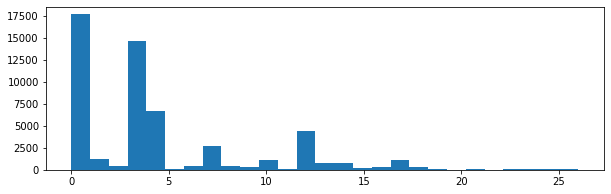

In [ ]:
#График предсказаний 

fig, plot = plt.subplots()
fig.set_figwidth(10)    
fig.set_figheight(3)

plot.hist(result,bins = 27)
plt.show()

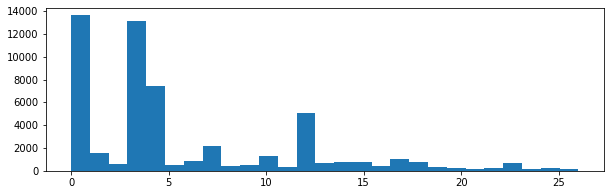

In [ ]:
#График True меток
fig, plot = plt.subplots()
fig.set_figwidth(10)    
fig.set_figheight(3)

plot.hist(true,bins = 27)
plt.show()